In [ ]:
import pandas as pd 
import numpy as np
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score, KFold
import matplotlib.pyplot as plt
from keras.utils.vis_utils import plot_model
import pickle

In [ ]:
df = pd.read_csv('data_moods.csv')

In [ ]:
df.columns

Index(['name', 'album', 'artist', 'id', 'release_date', 'popularity', 'length',
       'danceability', 'acousticness', 'energy', 'instrumentalness',
       'liveness', 'valence', 'loudness', 'speechiness', 'tempo', 'key',
       'time_signature', 'mood'],
      dtype='object')

In [ ]:
mood_df = df.drop(['name', 'album', 'artist', 'id', 'release_date','time_signature'],axis=1)

In [ ]:
mood = mood_df.groupby('mood')
train = mood.mean()

In [ ]:
train

,popularity,length,danceability,acousticness,energy,instrumentalness,liveness,valence,loudness,speechiness,tempo,key
mood,,,,,,,,,,,,
Calm,40.261538,193977.061538,0.406815,0.883348,0.156325,0.890769,0.115418,0.151421,-20.955826,0.040742,108.851215,5.441026
Energetic,41.603896,215779.948052,0.512240,0.028229,0.883669,0.056607,0.233897,0.437049,-4.695844,0.079170,132.060636,5.123377
Happy,48.585714,230963.850000,0.622914,0.127849,0.751857,0.126103,0.201682,0.579095,-7.275750,0.061774,124.213679,5.078571
Sad,37.730964,247504.472081,0.497245,0.578826,0.388068,0.201832,0.140655,0.289372,-10.569183,0.041736,115.599746,5.578680


In [ ]:
len(col_features)

10

In [ ]:
col_features = df.columns[6:-3]
X = df[col_features]
Y = df['mood']
print(X)

X= MinMaxScaler().fit_transform(X)

encoder = LabelEncoder()
encoder.fit(Y)
encoded_y = encoder.transform(Y)

X_train,X_test,Y_train,Y_test = train_test_split(X,encoded_y,test_size=0.2,random_state=15)

     length  danceability  acousticness  energy  instrumentalness  liveness  \
0    379266         0.866       0.13700  0.7300          0.000000    0.0843   
1    318800         0.381       0.01890  0.8320          0.196000    0.1530   
2    217946         0.346       0.91300  0.1390          0.000077    0.0934   
3    233000         0.466       0.08900  0.4380          0.000006    0.1130   
4    268000         0.419       0.00171  0.9320          0.000000    0.1370   
..      ...           ...           ...     ...               ...       ...   
681  123066         0.402       0.96100  0.2360          0.919000    0.0921   
682  435080         0.452       0.75700  0.5150          0.120000    0.1400   
683  169265         0.642       0.78600  0.3740          0.000000    0.0906   
684  219146         0.561       0.91300  0.0848          0.000026    0.1120   
685  186331         0.377       0.99400  0.0156          0.881000    0.0991   

     valence  loudness  speechiness    tempo  
0   

In [ ]:
def base_model():    
    model = Sequential()
    model.add(Dense(12,input_dim=10,activation='relu'))
    model.add(Dense(8,input_dim=10,activation='relu'))
    model.add(Dense(4,activation='softmax'))
    
    model.compile(loss='categorical_crossentropy',optimizer='adam',
          metrics=['accuracy'])
    return model


estimator = KerasClassifier(build_fn=base_model,epochs=300,
                            batch_size=200)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  del sys.path[0]


In [ ]:
history  = estimator.fit(X_train,Y_train)

Epoch 1/300
3/3 [==============================] - 0s 5ms/step - loss: 1.3995 - accuracy: 0.2865
Epoch 2/300
3/3 [==============================] - 0s 4ms/step - loss: 1.3845 - accuracy: 0.2865
Epoch 3/300
3/3 [==============================] - 0s 6ms/step - loss: 1.3694 - accuracy: 0.2865
Epoch 4/300
3/3 [==============================] - 0s 5ms/step - loss: 1.3556 - accuracy: 0.2865
Epoch 5/300
3/3 [==============================] - 0s 6ms/step - loss: 1.3411 - accuracy: 0.2883
Epoch 6/300
3/3 [==============================] - 0s 5ms/step - loss: 1.3290 - accuracy: 0.2920
Epoch 7/300
3/3 [==============================] - 0s 5ms/step - loss: 1.3170 - accuracy: 0.2901
Epoch 8/300
3/3 [==============================] - 0s 6ms/step - loss: 1.3057 - accuracy: 0.2974
Epoch 9/300
3/3 [==============================] - 0s 4ms/step - loss: 1.2948 - accuracy: 0.2974
Epoch 10/300
3/3 [==============================] - 0s 5ms/step - loss: 1.2841 - accuracy: 0.3011
Epoch 11/300
3/3 [===========

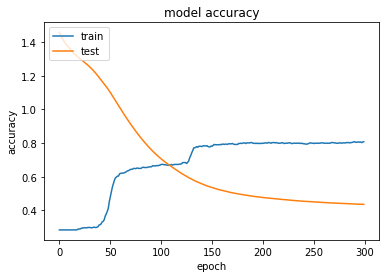

In [ ]:
# First 300 epochs

plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


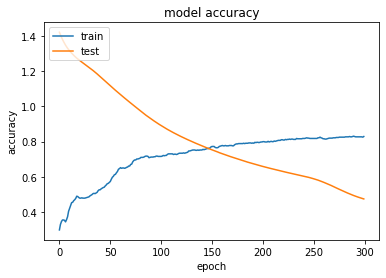

In [ ]:
# Second 300 epochs

plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

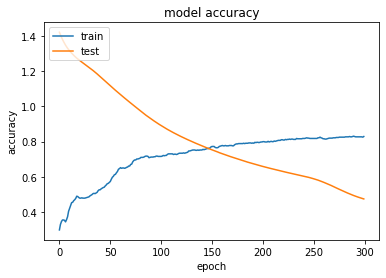

In [ ]:
# Third 300 epochs

plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

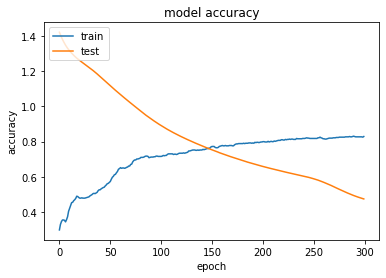

In [ ]:
# Fourth 300 epochs

plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
pickle.dump(estimator,open('model.pkl','wb'))

INFO:tensorflow:Assets written to: ram://3349c503-c6a9-4c37-a4d8-6c0ca50d71fa/assets


In [ ]:
df2 = pd.read_csv('spotify_songs.csv')
df2.head()

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052


In [ ]:
df2.dropna(inplace=True)
df2.reset_index(drop=True, inplace=True)

In [ ]:
df2.columns

Index(['track_id', 'track_name', 'track_artist', 'track_popularity',
       'track_album_id', 'track_album_name', 'track_album_release_date',
       'playlist_name', 'playlist_id', 'playlist_genre', 'playlist_subgenre',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms'],
      dtype='object')

In [ ]:
df2[col_features]
# print(df2[col_features])

col_features = ['duration_ms', 'danceability', 'acousticness', 'energy', 'instrumentalness', 'liveness', 'valence',
     'loudness',
     'speechiness',
     'tempo']  

df2[col_features] = MinMaxScaler().fit_transform(df2[col_features])

In [ ]:
def predict(song):
    song_df = df2[df2.track_name == song]
    col_features = ['duration_ms', 'danceability', 'acousticness', 'energy', 'instrumentalness', 'liveness', 'valence',
     'loudness',
     'speechiness',
     'tempo']  
    values = np.array(song_df[col_features])[0].reshape(-1,10)
    prediction = encoder.inverse_transform(estimator.predict(values))
    
    return f'{prediction[0]}'

In [ ]:
test = df2[df2.track_name == df2.track_name[8152]]
np.array(test[col_features])[0].reshape(-1,10)

array([[3.84696678e-01, 7.65005086e-01, 2.98792757e-01, 4.87910384e-01,
        9.16498994e-06, 9.39759036e-02, 5.37840565e-01, 8.25555812e-01,
        7.67973856e-02, 5.68163214e-01]])

In [ ]:
mood = []
for i in range(len(df2.track_name)):
  pred = predict(df2.track_name[i])
  mood.append(pred)

In [ ]:
df2['mood'] = mood

In [ ]:
df2.to_csv('final_songs.csv')

In [ ]:
model = base_model()
model.summary()

# Predicting 